In [1]:
from tensorflow.keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

We limited the num_words = 10000 thus no index will exceed 10000.

In [5]:
max(max(sequence) for sequence in train_data)

9999

Decoding reviews back to text

In [6]:
word_index = imdb.get_word_index()
word_index

1641221/1641221 [==============================] - 0s 0us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [7]:
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)

reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [8]:
decoded_review = ' '.join(
    [reverse_word_index.get(i-3,'?') for i in train_data[0]]
)

decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

We subtracted 3 from indices because in dataset, 0 represents for padding in the words, 1 represents the start of sequence and 2 for some unknown values which got cutted because of num_words, thus summing --> 0+1+2, we subtract 3 from each indice.

### Now we need to convert this list of integers to tensors so that we can feed it to the neural networks

We will one hot encode our list into a 10k dimensional vector

In [9]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [10]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

Vectorizing labels

In [11]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [12]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

Defining model with 2 layers each with 16 units and 1 output layer

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [14]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

Validation dataset

In [15]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Training model

In [16]:
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc']
)

history = model.fit(
    partial_X_train, 
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(X_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4991 - acc: 0.7839 - val_loss: 0.3919 - val_acc: 0.8441
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2932 - acc: 0.9001 - val_loss: 0.2949 - val_acc: 0.8880
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2150 - acc: 0.9281 - val_loss: 0.2882 - val_acc: 0.8840
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1723 - acc: 0.9423 - val_loss: 0.2864 - val_acc: 0.8843
Epoch 5/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1400 - acc: 0.9552 - val_loss: 0.3273 - val_acc: 0.8709
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1117 - acc: 0.9657 - val_loss: 0.3003 - val_acc: 0.8841
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0988 - acc: 0.9691 - val_loss: 0.3170 - val_acc: 0.8827
Epoch 8/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0758 - a

In [17]:
history_dict = history.history

In [18]:
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Plotting the training and validation loss

In [19]:
import matplotlib.pyplot as plt

In [20]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

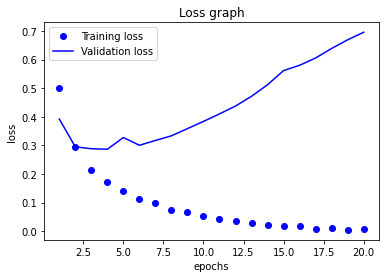

In [21]:
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'blue', label = 'Validation loss')
plt.title("Loss graph")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

plotting training and validation accuracy

In [23]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']

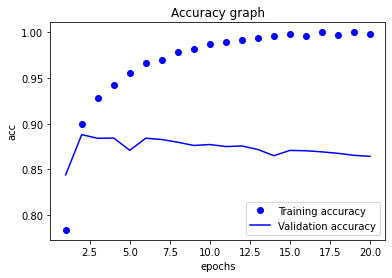

In [24]:
plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title("Accuracy graph")
plt.xlabel("epochs")
plt.ylabel("acc")
plt.legend()
plt.show()

## Reiterating new model 

In [25]:
model = keras.Sequential([
    layers.Dense(16,activation='relu'),
    layers.Dense(16,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

In [26]:
model.compile(
    optimizer = 'rmsprop',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs=4, batch_size=512) #Training on complete train dataset
results = model.evaluate(X_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 13ms/step - loss: 0.4344 - accuracy: 0.8274
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2482 - accuracy: 0.9136
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.1945 - accuracy: 0.9299
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3005 - accuracy: 0.8802


In [28]:
results

[0.300523579120636, 0.8802400231361389]

In [29]:
model.predict(X_test)

782/782 [==============================] - 1s 2ms/step


array([[0.20176895],
       [0.9998206 ],
       [0.7121148 ],
       ...,
       [0.12736781],
       [0.07625267],
       [0.71878475]], dtype=float32)